# Logistic Reegression
1) import library sklean, pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random as rd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model.logistic import  LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score


/Users/junewang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


2) Input data

In [2]:
X = pd.read_csv('../data_preprocessing/train_dummy.csv')
y=pd.read_csv('../data_preprocessing/training.csv')['IsBadBuy']

3) Split data into training and test data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [48]:
X_train

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WI,VNST_WV
20190,4,48189,4055.0,6124.0,6252.0,9298.0,4211.0,5045.0,7751.0,8454.0,...,0,0,0,0,0,0,0,0,0,0
39826,3,46256,5569.0,7189.0,9661.0,10657.0,5817.0,7330.0,9187.0,10541.0,...,0,0,0,0,0,0,0,0,0,0
67045,4,71662,4953.0,6635.0,5849.0,7666.0,7129.0,8685.0,8199.0,9880.0,...,0,0,0,0,0,0,0,0,0,0
55401,2,47656,7811.0,8258.0,11114.0,11562.0,7579.0,8423.0,11382.0,12156.0,...,0,0,0,0,0,0,0,0,0,0
67681,4,68764,3587.0,4679.0,7140.0,7772.0,3515.0,4449.0,6750.0,8544.0,...,0,0,0,0,1,0,0,0,0,0
53045,4,96050,4680.0,5805.0,7956.0,9132.0,4501.0,5553.0,7625.0,9044.0,...,0,0,0,1,0,0,0,0,0,0
4191,5,90317,7065.0,7897.0,11079.0,12384.0,7235.0,8354.0,10680.0,12216.0,...,0,0,0,0,1,0,0,0,0,0
4496,2,61802,7886.0,8747.0,11757.0,12686.0,8947.0,10312.0,12457.0,13839.0,...,0,0,0,0,0,0,0,0,0,0
13086,3,71807,8034.0,9584.0,11670.0,13167.0,7441.0,8783.0,11132.0,12558.0,...,0,0,0,0,0,0,0,0,0,0
1508,9,84780,2128.0,3055.0,4383.0,5688.0,2488.0,3150.0,4682.0,5232.0,...,0,1,0,0,0,0,0,0,0,0


4) Train logistic model and caculate the accuracy of training data and test data (with bias)

In [4]:
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X_train, y_train)
score_train = mdl.score(X_train,y_train)
score_test = mdl.score(X_test,y_test)
print("training data accuracy =",score_train,"; test data accuracy =",score_test)
roc_test = roc_auc_score(y_test, model.predict(X_test),average='weighted')
print("training data roc =",roc_test)

training data accuracy = 0.877994832446 ; test data accuracy = 0.874720255766
training data roc = 0.5


The accuracy is very high but the roc is not very good

5) get of bad and good samples

In [5]:
y_train_reset = y_train.reset_index(drop=True)
X_train_reset = X_train.reset_index(drop=True)
y_good_index = []
y_bad_index = []
index_new=[]
for i in range(0,len(y_train_reset)):
    if y_train_reset[i] == 0:
        y_good_index.append(i)
    else:
        y_bad_index.append(i) 

6) Get a list of same number of bad and good samples 

  a) have repeated records; X_train_new and y_train_new are the new lists

In [6]:
index_new_all = []
for i in range(0,7):
    y_good_index_new = []
    y_bad_index_new = []
    index_new = []
    rd.shuffle(y_good_index)
    rd.shuffle(y_good_index)
    y_good_index_new = rd.sample(y_good_index, 1000)
    y_bad_index_new = rd.sample(y_bad_index, 1000)         
    index_new = y_good_index_new+y_bad_index_new
    rd.shuffle(index_new)
    index_new_all = index_new_all+index_new

y_train_new = y_train_reset[index_new_all]
X_train_new = X_train_reset.loc[index_new_all,:]




In [7]:
#Not use penalty in logistic regression in repeated records
model = LogisticRegression()
%time 
model_nopenalty = model.fit(X_train_new, y_train_new)

# check the accuracy on the training set and test set
nop_score_train = model_nopenalty.score(X_train_new, y_train_new)
nop_score_test = model_nopenalty.score(X_test, y_test)
print (nop_score_train)
print (nop_score_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
0.691642857143
0.735921443252


In [8]:
roc_test = roc_auc_score(y_test, model.predict(X_test),average='weighted')
print("training data roc =",roc_test)

training data roc = 0.687564510681


  b)  have no repeated records; X_train_new2 and y_train_new2 are the new lists

In [27]:
#have no repeated record
y_good_index_new2 = rd.sample(y_good_index, 6233)
y_bad_index_new2 = rd.sample(y_bad_index, 6233) 
index_new2 = y_good_index_new2+y_bad_index_new2
y_train_new2 = y_train_reset[index_new2]
X_train_new2 = X_train_reset.loc[index_new2,:]
print(len(y_train_new2))

#Not use penalty in logistic regression in records without repetition
model2 = LogisticRegression()
%time 
model_nopenalty2 = model2.fit(X_train_new2, y_train_new2)

# check the accuracy on the training set and test set
nop_score_train2 = model_nopenalty2.score(X_train_new2, y_train_new2)
nop_score_test2 = model_nopenalty2.score(X_test, y_test)
print (nop_score_train2)
print (nop_score_test2)

12466
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
0.684341408631
0.725462434346


Compared with the repeated records, the accuracy is close

7) logistic regression with penalty

In [62]:
##logistical regression
coef_l1_LR_all = []
coef_l2_LR_all = []
sparsity_l1_LR_all = []
sparsity_l2_LR_all = []
score_l1_LR_all = []
score_l2_LR_all = []
score_l1_LR_train_all = []
score_l2_LR_train_all = []

C_all = np.linspace(0.001,0.3, num=30)
for i, C in enumerate(C_all):
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X_train_new2, y_train_new2)
    clf_l2_LR.fit(X_train_new2, y_train_new2)
    
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_l1_LR_all.append(coef_l1_LR)
    coef_l2_LR_all.append(coef_l2_LR)
    
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    score_l1_LR_train = clf_l1_LR.score(X_train_new2,y_train_new2)
    score_l2_LR_train = clf_l2_LR.score(X_train_new2,y_train_new2)
    score_l1_LR = clf_l1_LR.score(X_test,y_test)
    score_l2_LR = clf_l2_LR.score(X_test,y_test)
    roc_l1_LR = roc_auc_score(y_test, clf_l1_LR.predict(X_test))

    sparsity_l1_LR_all.append(sparsity_l1_LR)
    sparsity_l2_LR_all.append(sparsity_l2_LR)
    score_l1_LR_all.append(score_l1_LR)
    score_l2_LR_all.append(score_l2_LR)
    score_l1_LR_train_all.append(score_l1_LR_train)
    score_l2_LR_train_all.append(score_l2_LR_train)
    
    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("training data score with L1 penalty: %.4f" % score_l1_LR_train)
    print("score with L1 penalty: %.4f" % score_l1_LR)
    print("test data roc score with L1 penalty: %.4f" % roc_l1_LR)

    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % score_l2_LR)
    print("training data score with L2 penalty: %.4f" % score_l2_LR_train)

plt.figure(1)
plt.subplot(211)
plt.plot(C_all[1:30], sparsity_l1_LR_all[1:30], 'k')
plt.plot(C_all[1:30], sparsity_l2_LR_all[1:30], 'r--')
plt.grid(True)
plt.figure(1)
plt.subplot(212)
plt.plot(C_all[1:30], score_l1_LR_train_all[1:30],'k')
#plt.plot(C_all[1:30], score_l1_LR_train_all[1:30],'b')
plt.grid(True)



C=0.00
Sparsity with L1 penalty: 90.97%
training data score with L1 penalty: 0.5995
score with L1 penalty: 0.5844
test data roc score with L1 penalty: 0.6024
Sparsity with L2 penalty: 3.47%
score with L2 penalty: 0.5783
training data score with L2 penalty: 0.5954
C=0.01
Sparsity with L1 penalty: 86.81%
training data score with L1 penalty: 0.6767
score with L1 penalty: 0.7397
test data roc score with L1 penalty: 0.6741
Sparsity with L2 penalty: 3.47%
score with L2 penalty: 0.5783
training data score with L2 penalty: 0.5954
C=0.02
Sparsity with L1 penalty: 81.25%
training data score with L1 penalty: 0.6835
score with L1 penalty: 0.7437
test data roc score with L1 penalty: 0.6790
Sparsity with L2 penalty: 3.47%
score with L2 penalty: 0.5783
training data score with L2 penalty: 0.5954
C=0.03
Sparsity with L1 penalty: 77.78%
training data score with L1 penalty: 0.6856
score with L1 penalty: 0.7467
test data roc score with L1 penalty: 0.6842
Sparsity with L2 penalty: 3.47%
score with L2 pena

In [63]:
print(score_l1_LR_all)
# from the score_l1_LR_all we can see the fifth value is highest

[0.5844256679607216, 0.73971226307376114, 0.74368577300753602, 0.74665448732587347, 0.74743092030143865, 0.74747659282941314, 0.74829869833295271, 0.74802466316510619, 0.74889244119662024, 0.74788764558118292, 0.74679150490979673, 0.74679150490979673, 0.74665448732587347, 0.74615208951815482, 0.7451472939027175, 0.74501027631879424, 0.74519296643069199, 0.74510162137474312, 0.74546700159853851, 0.74596939940625717, 0.74569536423841054, 0.74532998401461525, 0.7451472939027175, 0.74501027631879424, 0.74473624115094772, 0.74569536423841054, 0.74532998401461525, 0.74505594884676862, 0.7451472939027175, 0.74441653345512671]


In [12]:
#the best one the fifth time fitting
list = np.where(coef_l1_LR_all[4] != 0)[0].tolist()
head = X.columns.values.tolist()
best_test_score = score_l1_LR_all[4]
best_model = score_l1_LR_all[4]
best_train_score = score_l1_LR_train_all[4]
print(best_test_score)
#head(list)
need_head = []
for i in list:
    need_head.append(head[i])
print(need_head)

0.749440511532
['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VehBCost', 'WarrantyCost', 'Auction_MANHEIM', 'Auction_OTHER', 'Make_DODGE', 'Transmission_AUTO', 'WheelTypeID_1.0', 'WheelTypeID_2.0', 'WheelTypeID_U0', 'Nationality_AMERICAN', 'Size_COMPACT', 'Size_LARGE', 'Size_MEDIUM', 'Size_MEDIUM SUV', 'TopThreeAmericanName_GM', 'PRIMEUNIT_NO', 'AUCGUART_GREEN', 'VNST_AZ', 'VNST_FL', 'VNST_NC', 'VNST_TX', 'VNST_VA']


In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes=['Good', 'Bad'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   # if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       # print("Normalized confusion matrix")
   # else:
       # print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [95]:
C=0.08
lf = LogisticRegression(C=C, penalty='l1', tol=0.01)
lf.fit(X_train_new2, y_train_new2)
y_pred = lf.predict(X_test)
score_l1_LR = lf.score(X_test,y_test)
print('Accuracy = {}'.format(score_l1_LR))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,title = 'test')
roc_lf_LR = roc_auc_score(y_test, lf.predict(X_test))



Accuracy = 0.7480246631651062
[[14688  4464]
 [ 1053  1690]]


In [96]:
roc_lf_LR

0.69151551865445604

# Naive Bayes
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [80]:
# the original dataset ( the bad and good data not balance)
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
test_ga_score = gnb_model.score(X_test,y_test)
train_ga_score = gnb_model.score(X_train,y_train)
print("test data accuracy:",test_ga_score)
print("training data accuracy:",train_ga_score )
roc_auc_score(y_train, gnb_model.predict(X_train))



test data accuracy: 0.768897008449
training data accuracy: 0.767088161604


0.58900470655726989

In [82]:
##use the same number of bad and good car
gnb2 = GaussianNB()
%time gnb2_model = gnb.fit(X_train_new, y_train_new)
score2_ga_test = gnb2_model.score(X_test,y_test)
score2_ga_train = gnb2_model.score(X_train_new, y_train_new)
print("test data accuracy:",score2_ga_test)
print("training data accuracy:",score2_ga_train )
roc_auc_score(y_train_new, gnb2_model.predict(X_train_new))



CPU times: user 55.7 ms, sys: 21.3 ms, total: 77.1 ms
Wall time: 77 ms
test data accuracy: 0.641059602649
training data accuracy: 0.612714285714


0.61271428571428577

MultinomialNB for multinomially distributed data (used in text classification)
BernoulliNB for data that is distributed according to multivariate Bernoulli distributions
both is not suitable in this project

In [84]:
#MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification
clf = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf_model = clf.fit(X_train, y_train)
score2_clf_test = clf_model.score(X_test,y_test)
score2_clf_train = clf_model.score(X_train_new, y_train_new)
print("test data accuracy:",score2_clf_test)
print("training data accuracy:",score2_clf_train )
roc_clf_model = roc_auc_score(y_train_new, clf_model.predict(X_train_new))
print("roc",roc_clf_model)

clfb = BernoulliNB()
clfb_model = clfb.fit(X_train, y_train)
score2_clfb_test = clfb_model.score(X_test,y_test)
score2_clfb_train = clfb_model.score(X_train_new, y_train_new)
print("test data accuracy:",score2_clfb_test)
print("training data accuracy:",score2_clfb_train )
roc_clfb_model = roc_auc_score(y_train_new, clf_model.predict(X_train_new))
print("roc",roc_clfb_model)

test data accuracy: 0.481068737155
training data accuracy: 0.570214285714
roc 0.570214285714
test data accuracy: 0.894359442795
training data accuracy: 0.618214285714
roc 0.570214285714


#    Comparison logistic and Naive Bayes

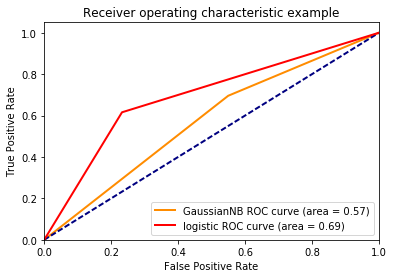

In [94]:
GaussianNB_fpr, GaussianNB_tpr, _ = roc_curve(y_test,clf_model.predict(X_test))
log_fpr, log_tpr, _ = roc_curve(y_test,lf.predict(X_test))


GaussianNB_roc_auc = auc(GaussianNB_fpr, GaussianNB_tpr)
log_roc_auc = auc(log_fpr, log_tpr)


plt.figure()
lw = 2
plt.plot(GaussianNB_fpr, GaussianNB_tpr, color='darkorange',
         lw=lw, label='GaussianNB ROC curve (area = %0.2f)' % GaussianNB_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(log_fpr, log_tpr, color='red',
         lw=lw, label='logistic ROC curve (area = %0.2f)' % log_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

 the logistic is better